# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib

Import the core data science libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [3]:
df = pd.read_csv('./data/2018_Central_Park_Squirrel_Census_Squirrel_Data.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

__This code shows 5 rows in random__

In [4]:
df.sample(5)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
509,-73.958610,40.793965,35D-AM-1019-01,35D,AM,10192018,1,NaN,NaN,NaN,...,True,False,False,False,False,False,False,False,NaN,POINT (-73.9586098170241 40.7939653733898)
934,-73.961620,40.792619,33B-PM-1010-01,33B,PM,10102018,1,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9616204569548 40.7926188605509)
654,-73.955373,40.798758,41D-AM-1014-02,41D,AM,10142018,2,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9553726714504 40.7987578541123)
2649,-73.953825,40.791936,35I-PM-1006-01,35I,PM,10062018,1,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9538251716292 40.7919360198175)
2356,-73.963230,40.792571,32A-PM-1013-06,32A,PM,10132018,6,Juvenile,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9632301034883 40.7925707244111)


__This code shows the data types of each column and their names__

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

__This code shows how many areas have squirrels that are primary cinnamon color!__

In [6]:
df['Primary Fur Color'].str.count('Cinnamon').sum()

392.0

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

__I will remove those columns because many rows in those columns are empty__

In [7]:
new_df = df.drop(['Color notes', 'Specific Location', 'Other Activities', 'Other Interactions'], axis=1)

__I will fill the empty cells in column "Above Ground Sighter Measurement" with False__

In [8]:
new_df["Above Ground Sighter Measurement"] = df["Above Ground Sighter Measurement"].fillna('FALSE')

__I will fill the empy cells in column "Hightlight Fur Color" with the value in "Primary Fur Color"__

In [9]:
new_df['Highlight Fur Color'] = new_df['Highlight Fur Color'].fillna(new_df['Primary Fur Color'])

__I will drop rows with empy cells and rows that have '?' in its age column__

In [10]:
new_df = new_df.dropna()
new_df = new_df[new_df['Age'] != '?']

__Show 5 random rows__

In [11]:
new_df.sample(5)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Lat/Long
1281,-73.979573,40.767867,1C-PM-1013-07,01C,PM,10132018,7,Adult,Cinnamon,Gray,...,True,False,False,False,False,False,False,False,False,POINT (-73.9795728289645 40.7678669804787)
825,-73.955726,40.793951,37F-PM-1014-02,37F,PM,10142018,2,Juvenile,Gray,"Cinnamon, White",...,True,False,False,False,False,False,False,True,False,POINT (-73.95572635334891 40.7939505791448)
988,-73.960303,40.794367,35C-PM-1013-05,35C,PM,10132018,5,Adult,Gray,Cinnamon,...,True,False,False,False,False,False,False,False,False,POINT (-73.9603031059614 40.7943667735668)
1616,-73.964267,40.781038,21G-PM-1007-03,21G,PM,10072018,3,Adult,Gray,Cinnamon,...,True,False,False,False,True,False,False,True,False,POINT (-73.96426660132072 40.7810384867375)
1894,-73.969978,40.768871,6I-PM-1013-01,06I,PM,10132018,1,Adult,Gray,Black,...,False,False,False,False,False,True,False,True,False,POINT (-73.9699780857298 40.7688706046944)


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

In [12]:
new_df.describe()

,X,Y,Date,Hectare Squirrel Number
count,2822.000000,2822.000000,2.822000e+03,2822.000000
mean,-73.967279,40.780687,1.011968e+07,4.108788
std,0.007716,0.010276,4.263939e+04,3.112769
min,-73.981159,40.764911,1.006202e+07,1.000000
25%,-73.973191,40.771517,1.008202e+07,2.000000
50%,-73.968717,40.777969,1.012202e+07,3.000000
75%,-73.960309,40.791147,1.014202e+07,6.000000
max,-73.949842,40.800119,1.020202e+07,23.000000


__1. Shows the age distribution of the squirrels.__

In [13]:
new_df['Age'].value_counts()

Adult       2503
Juvenile     319
Name: Age, dtype: int64

__2. Count the Combination of Primary and Highlight Color.__

In [14]:
new_df.groupby('Combination of Primary and Highlight Color')['Combination of Primary and Highlight Color'].count()

Combination of Primary and Highlight Color
Black+                          71
Black+Cinnamon                  15
Black+Cinnamon, White            3
Black+Gray                       8
Black+Gray, White                1
Black+White                      2
Cinnamon+                       58
Cinnamon+Black                  10
Cinnamon+Black, White            3
Cinnamon+Gray                  155
Cinnamon+Gray, Black             3
Cinnamon+Gray, White            56
Cinnamon+White                  90
Gray+                          847
Gray+Black                      24
Gray+Black, Cinnamon             9
Gray+Black, Cinnamon, White     31
Gray+Black, White                7
Gray+Cinnamon                  706
Gray+Cinnamon, White           258
Gray+White                     465
Name: Combination of Primary and Highlight Color, dtype: int64

__3. Find the Squirrel behaviors percentage between different color groups__

In [15]:
color_groups = new_df.groupby('Primary Fur Color')
behaviors = ['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging']
behavior_percentages = {}
for color, group in color_groups:
    color_percentages = {}
    for behavior in behaviors:
        color_percentages[behavior] = group[behavior].mean() * 100
    behavior_percentages[color] = color_percentages

print(behavior_percentages)

{'Black': {'Running': 25.0, 'Chasing': 6.0, 'Climbing': 25.0, 'Eating': 23.0, 'Foraging': 42.0}, 'Cinnamon': {'Running': 27.200000000000003, 'Chasing': 7.733333333333333, 'Climbing': 21.6, 'Eating': 28.53333333333333, 'Foraging': 50.93333333333333}, 'Gray': {'Running': 24.371538133787816, 'Chasing': 9.45888368129527, 'Climbing': 22.113336173838942, 'Eating': 24.968044311887517, 'Foraging': 47.976139752876016}}


__4. Find the top 5 hectares with the highest number of squirrel sightings.__

In [16]:
hectares = new_df.groupby('Hectare').size().reset_index(name = 'Sightings')

top_hectaures = hectares.sort_values('Sightings', ascending = False).head(5)

print(top_hectaures)

    Hectare  Sightings
120     14E         28
242     32E         28
119     14D         27
110     13D         25
1       01B         25


__5. Find the percentage of adult and juvenile squirrels that were sighted above ground.__

In [17]:
above_ground = new_df[new_df['Above Ground Sighter Measurement'] != 'FALSE']

adult = above_ground[above_ground['Age'] == 'Adult'].shape[0]
juvenile = above_ground[above_ground['Age'] == 'Juvenile'].shape[0]
total = adult + juvenile

percent_adult = (adult / total) * 100
percent_juvenile = (juvenile / total) * 100

print(f'Percentage of adult squirrels that were found above ground: {percent_adult:.2f}%')
print(f'Percentage of juvenile squirrels that were found above ground: {percent_juvenile:.2f}%')

Percentage of adult squirrels that were found above ground: 84.96%
Percentage of juvenile squirrels that were found above ground: 15.04%


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

__1. This is a bar chart showing the age distribution of the squirrels.__

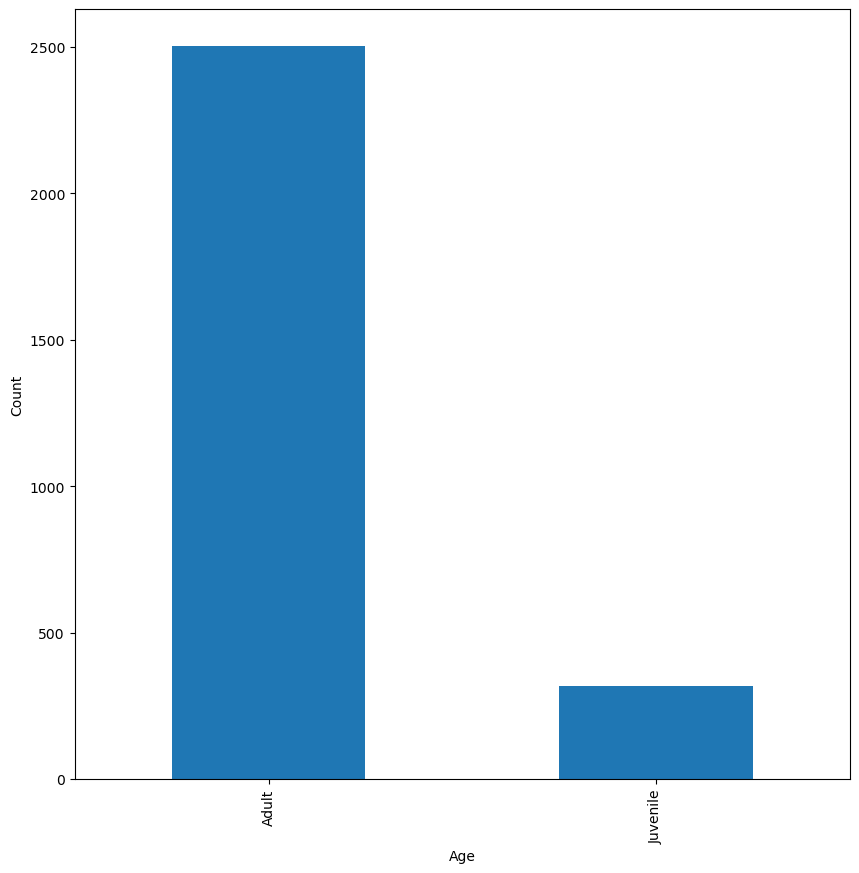

In [18]:
age = new_df['Age'].value_counts()

plt.figure(figsize = (10, 10))
age.plot(kind = 'bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

__2. This is a pie chart showing the combination of primary and highlight color distribution.__

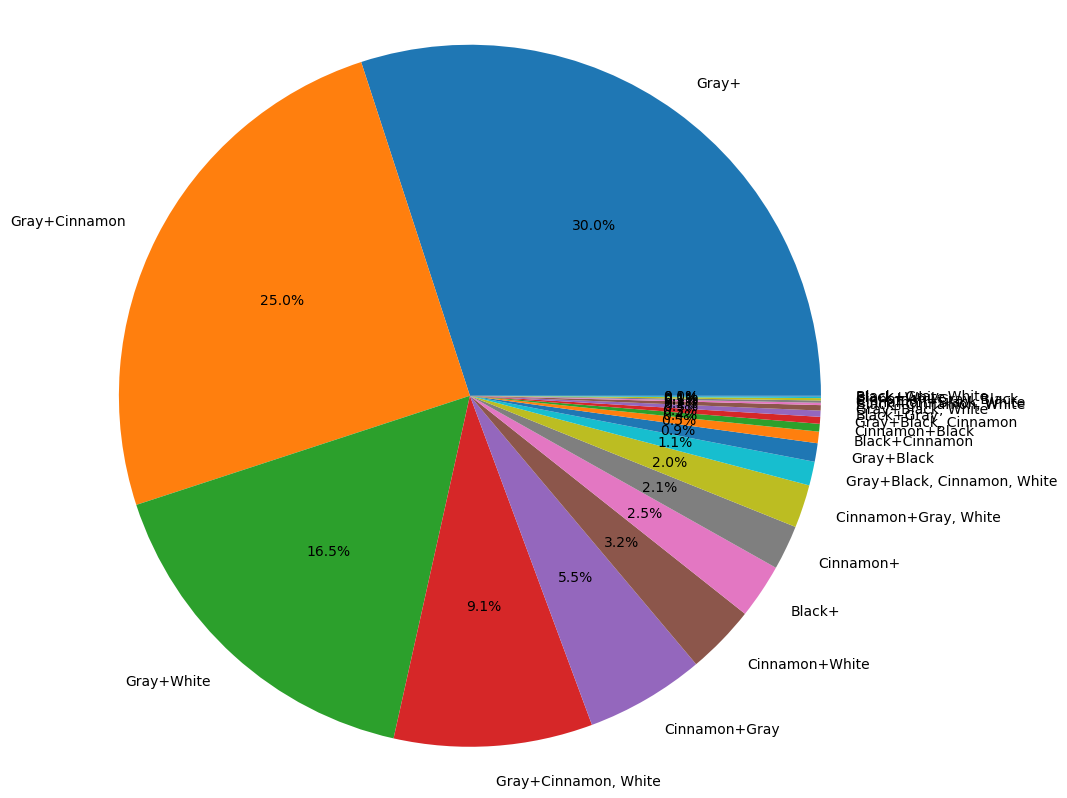

In [19]:
color_counts = new_df['Combination of Primary and Highlight Color'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()




__3. This is a line plot showing the number of squirrels sighting in different locations.__

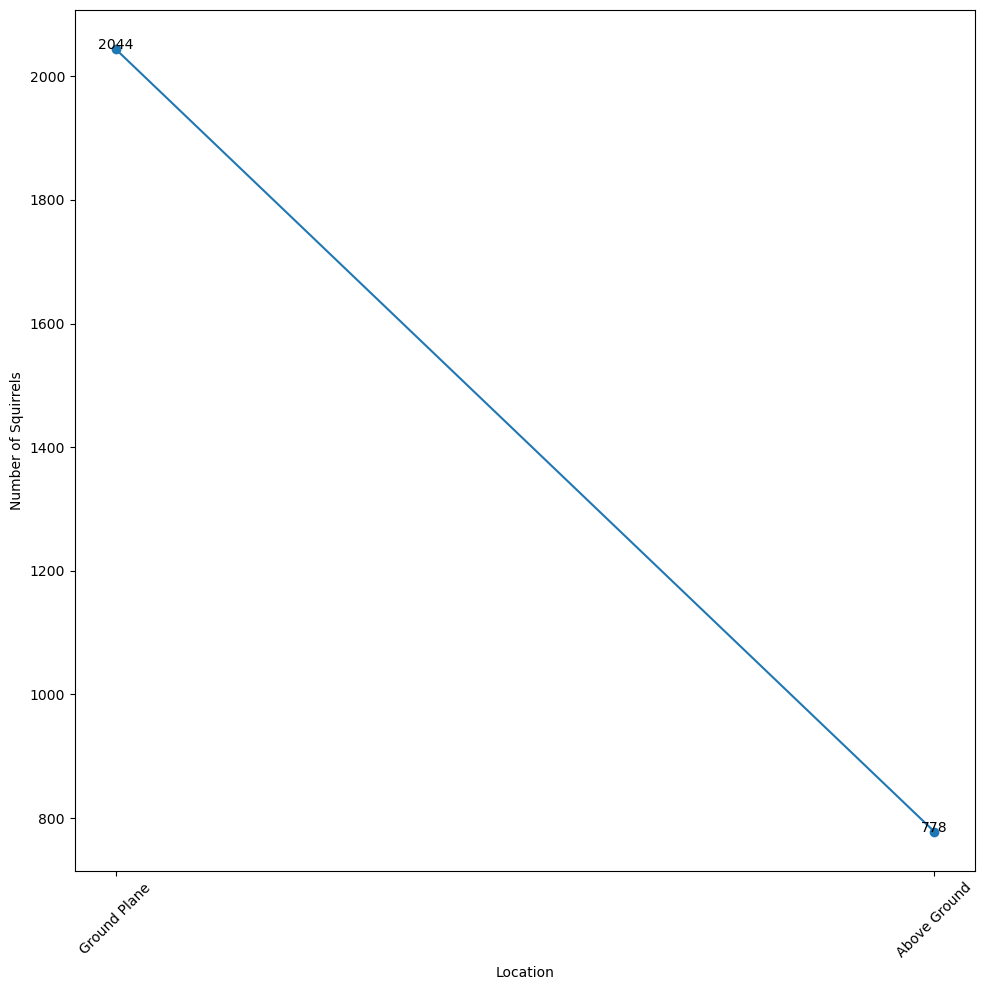

In [20]:
location_counts = new_df['Location'].value_counts()

# Create a line plot
plt.figure(figsize=(10, 10))
plt.plot(location_counts.index, location_counts.values, marker='o')
plt.xlabel('Location')
plt.ylabel('Number of Squirrels')
plt.xticks(rotation=45)
for ii, count in enumerate(location_counts.values):
    plt.text(ii, count + 0.1, str(count), ha='center')
plt.tight_layout()
plt.show()

__4. This is a bar chart showing the percentage of squirrels performing different action.__

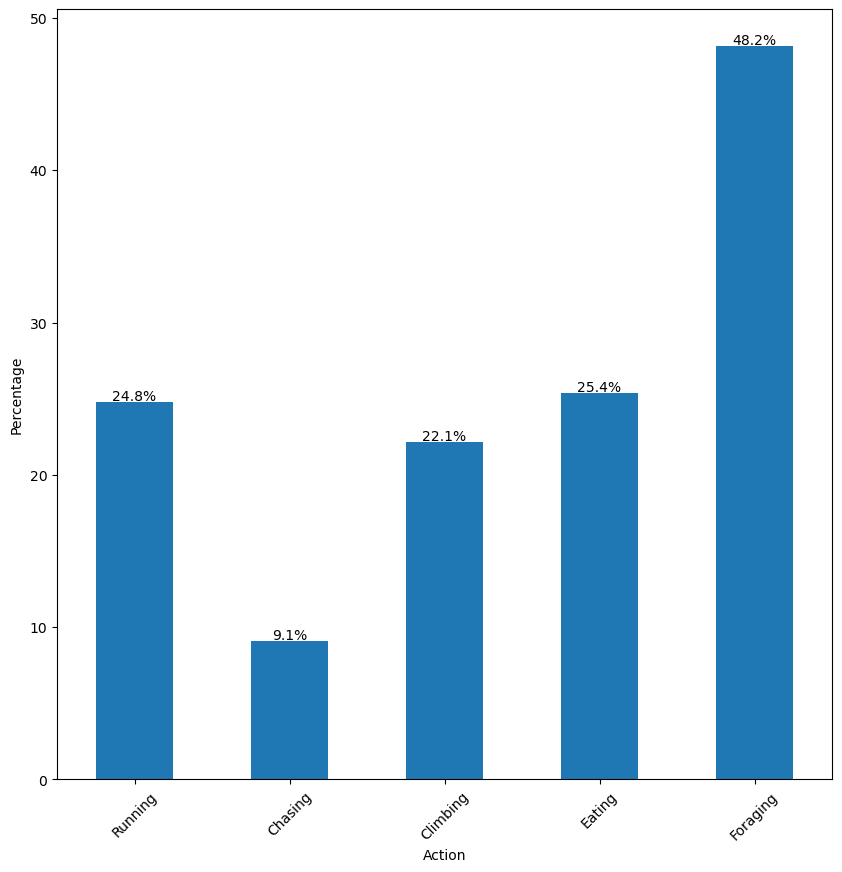

In [21]:
total = len(new_df)
activities = new_df[['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging']].sum()/total * 100

plt.figure(figsize=(10, 10))
activities.plot(kind = 'bar')
plt.xlabel('Action')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
for ii, percent in enumerate(activities.values):
    plt.text(ii, percent + 0.1, f'{percent:.1f}%', ha = 'center')
plt.show()

__5. This is a pie chart showing the percentage of squirrels sighting in evening of morning__

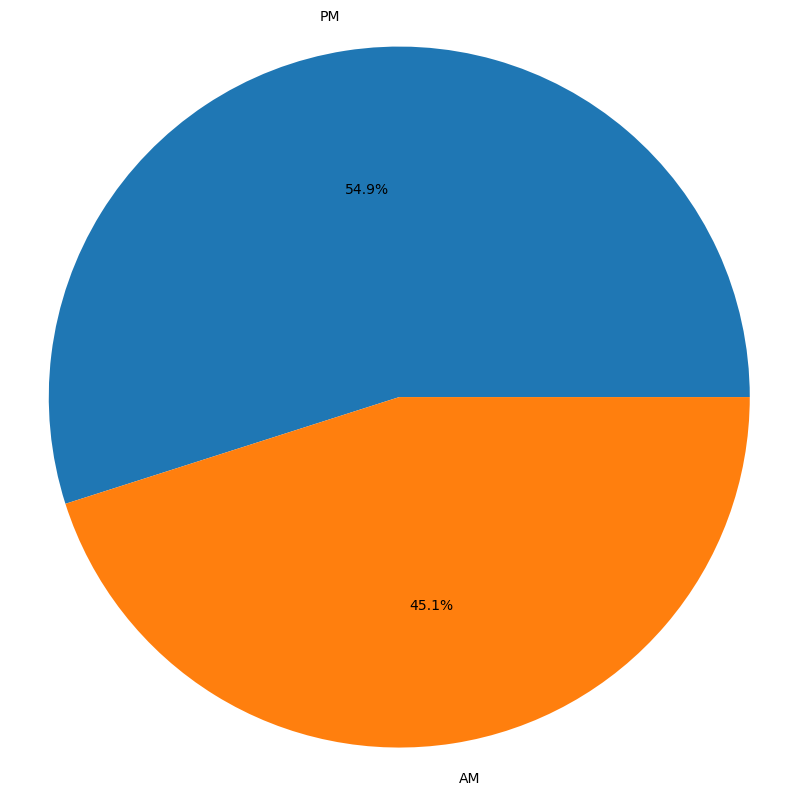

In [22]:
shift_counts = new_df['Shift'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(shift_counts, labels=shift_counts.index, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()